In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
import matplotlib.animation as ani
import matplotlib.ticker as ticker
%matplotlib inline

timestep=2 #ns, must be the same for the two files
thickness_of_sample=110500*0.0001 #micrometers
energy_impulse=500 #mJ/cm^2
maxTempReached=1300 #K, is written in the end line of file .mlt
filename1='GE0.5.td'
filename2='GE0.5.mlt'

In [6]:
#non c'è bisogno di ricompilarlo se il file non è nuovo

with open(filename1, mode='r+') as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i[0] != 'C':
            f.write(i)
    f.truncate()

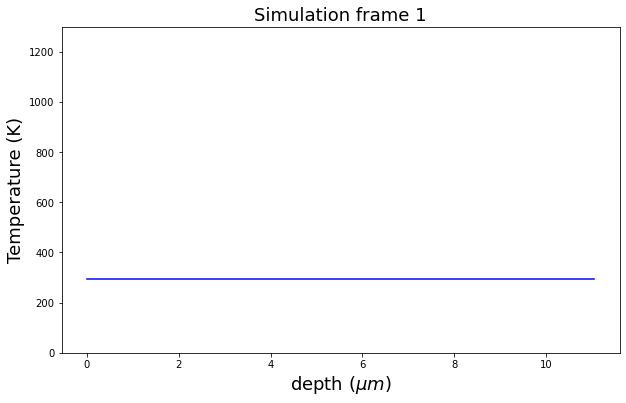

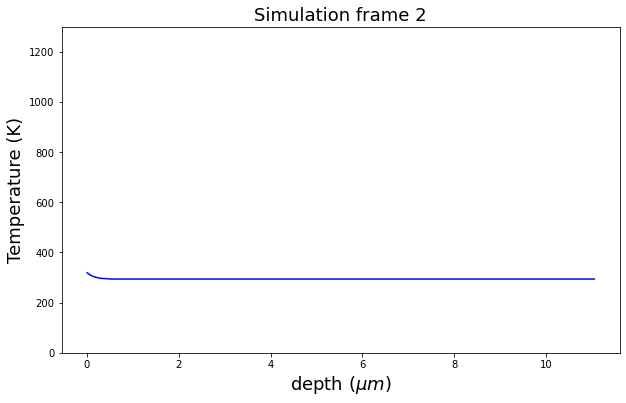

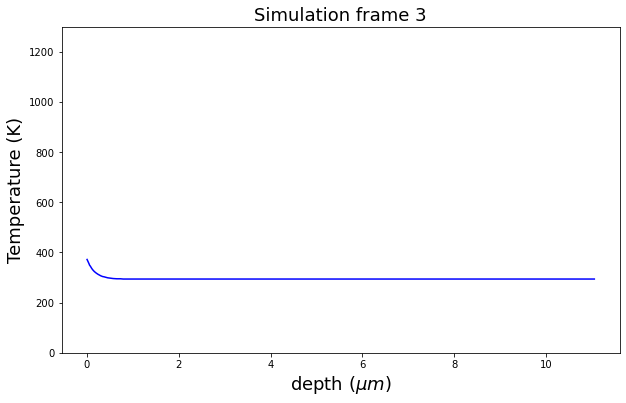

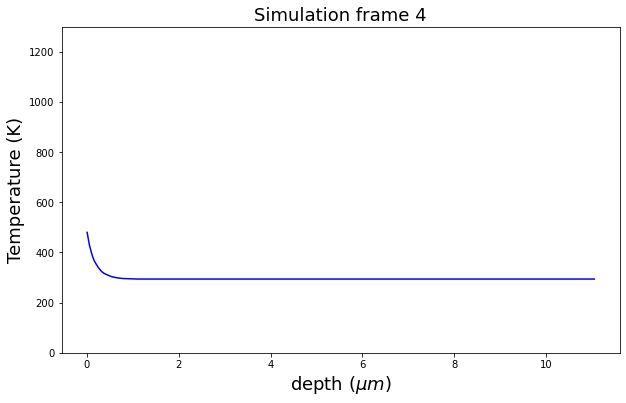

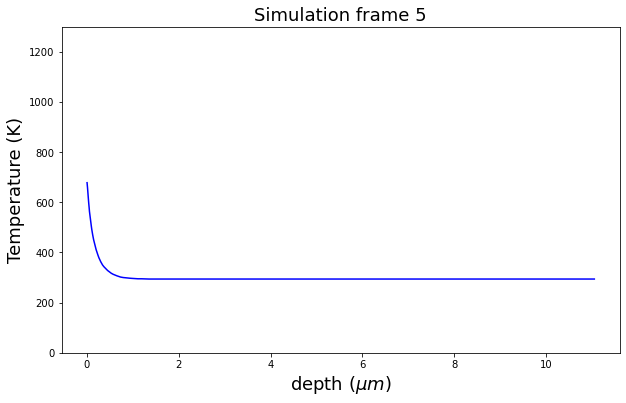

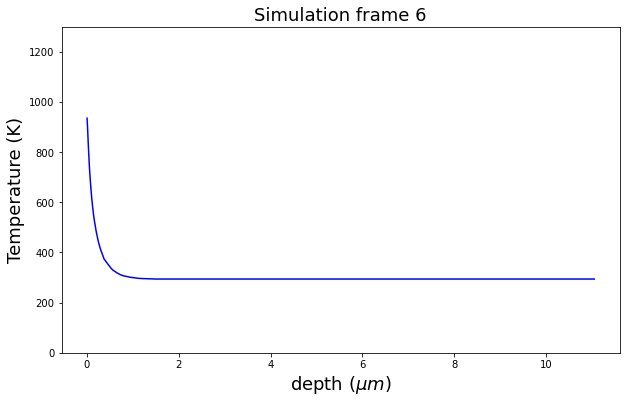

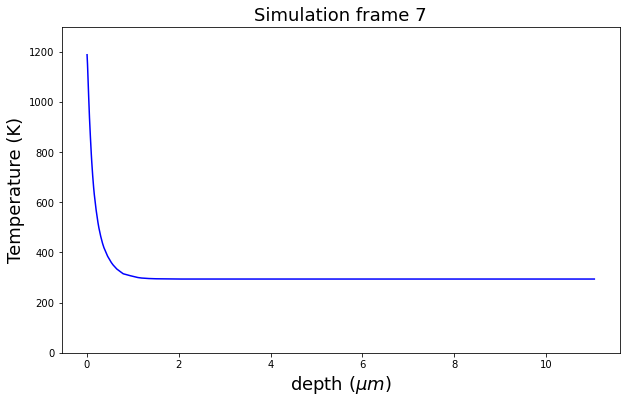

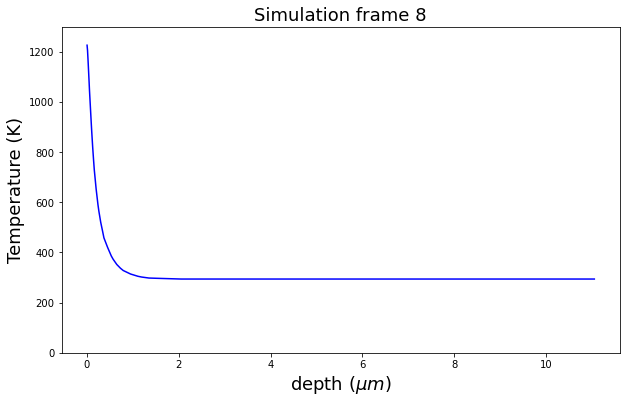

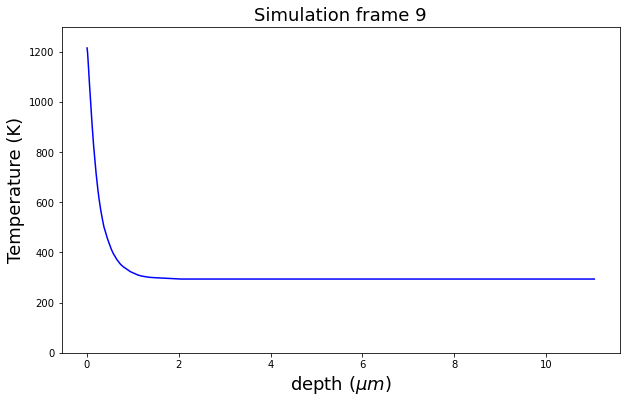

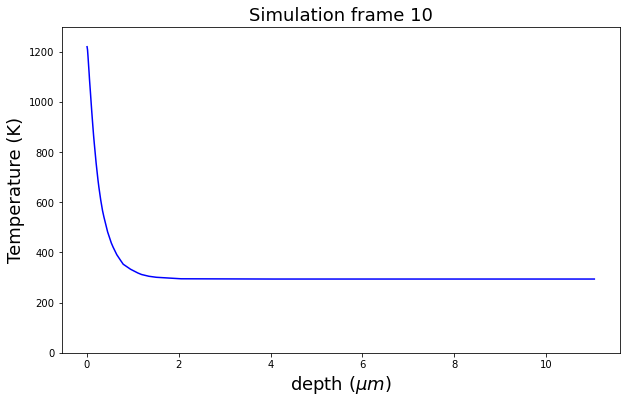

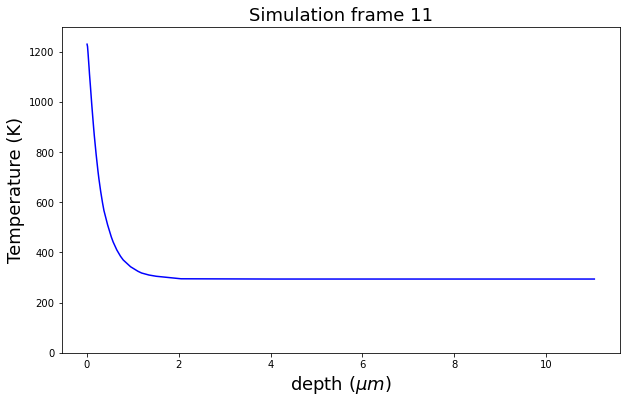

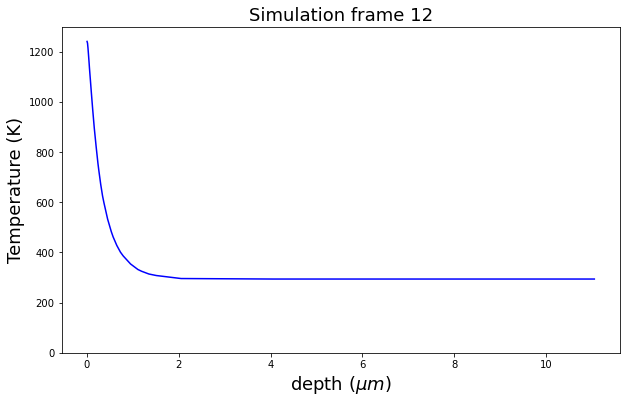

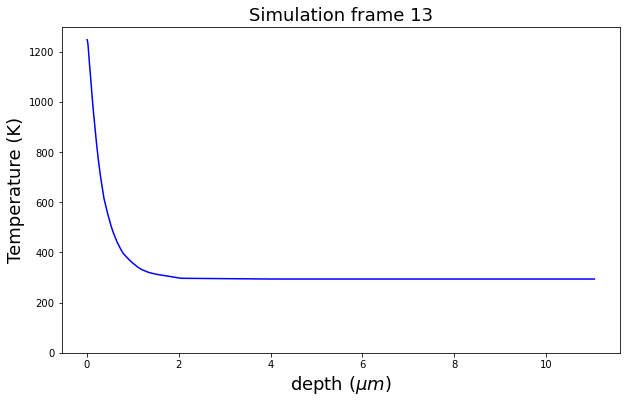

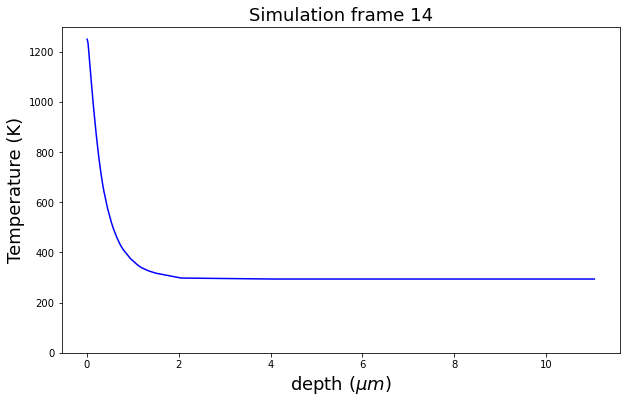

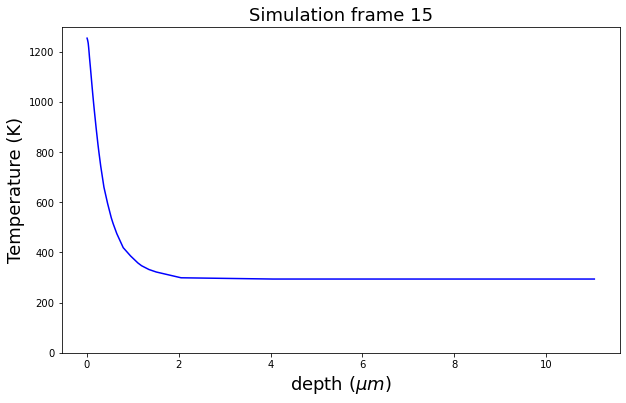

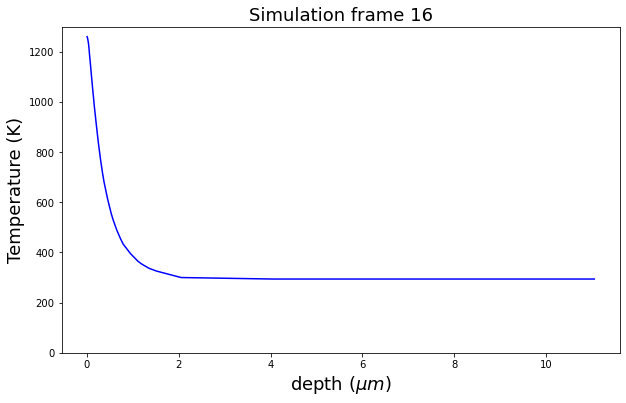

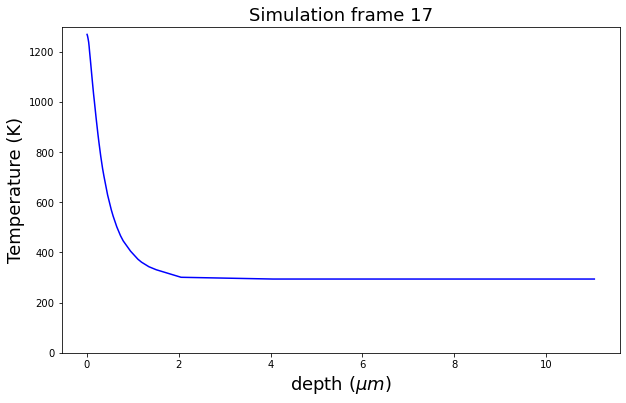

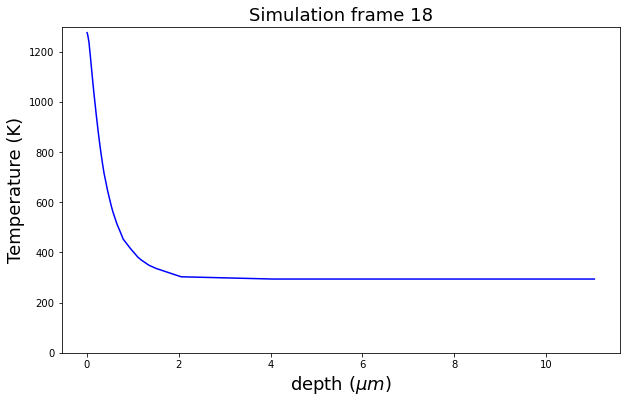

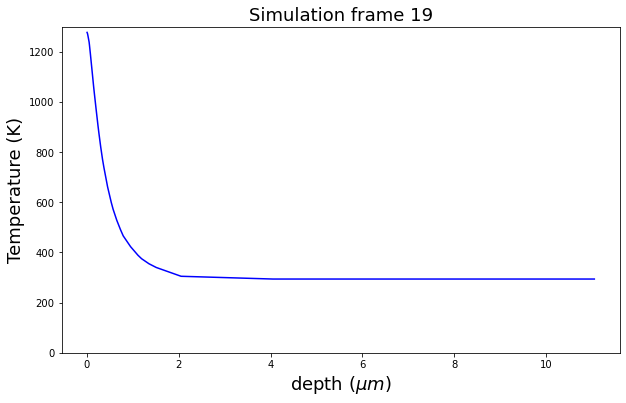

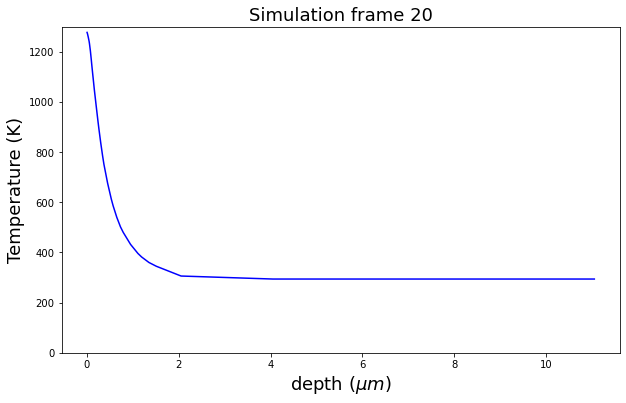

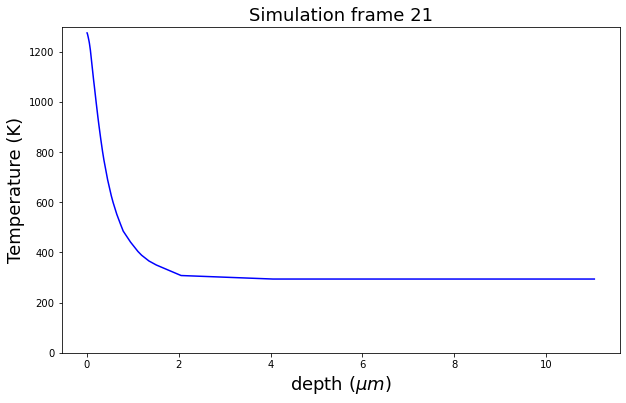

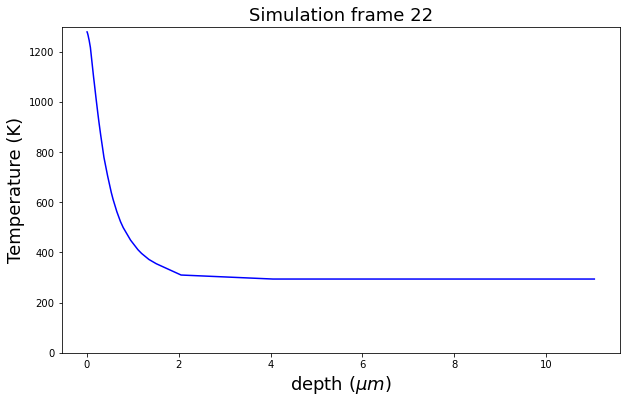

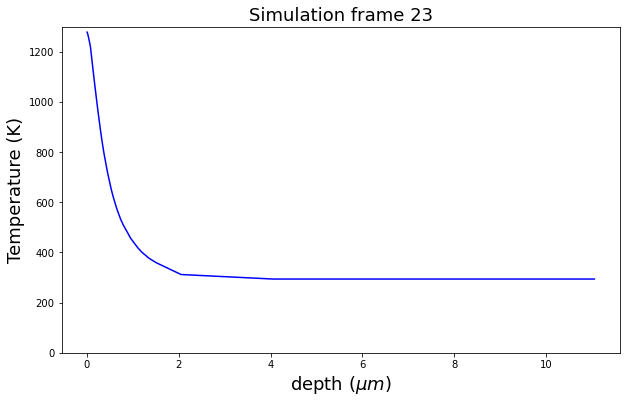

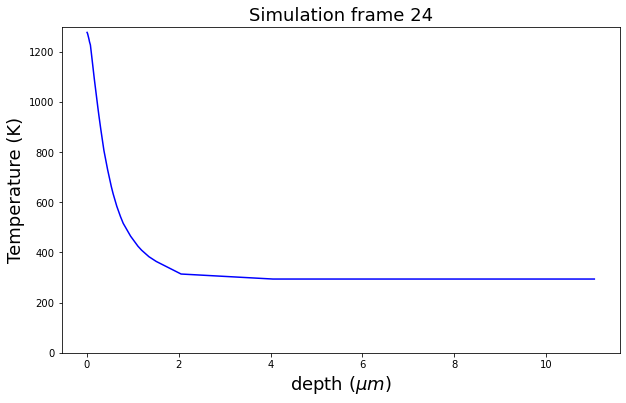

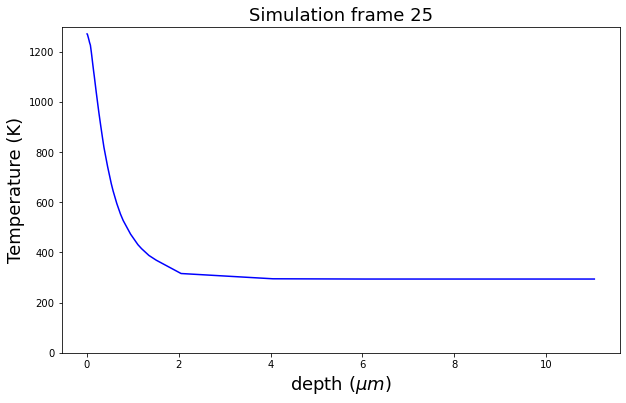

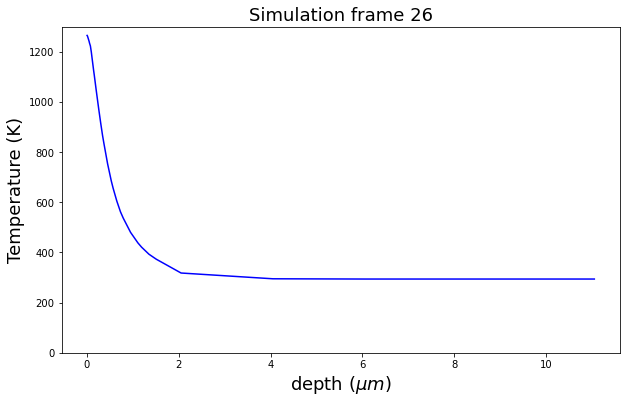

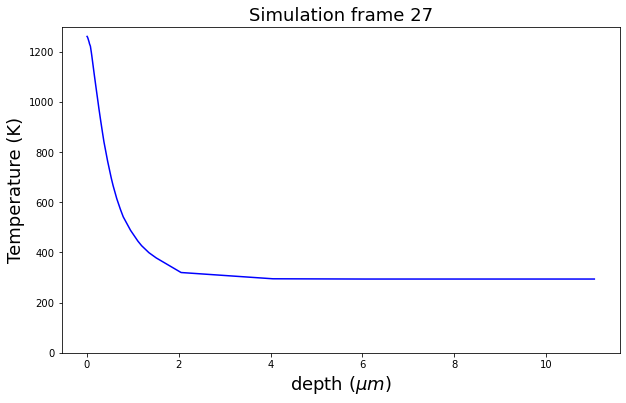

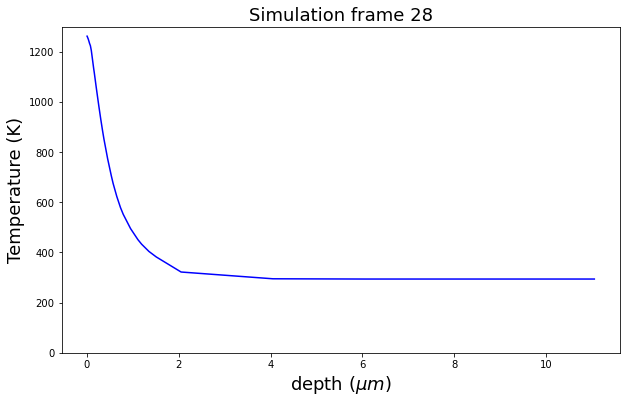

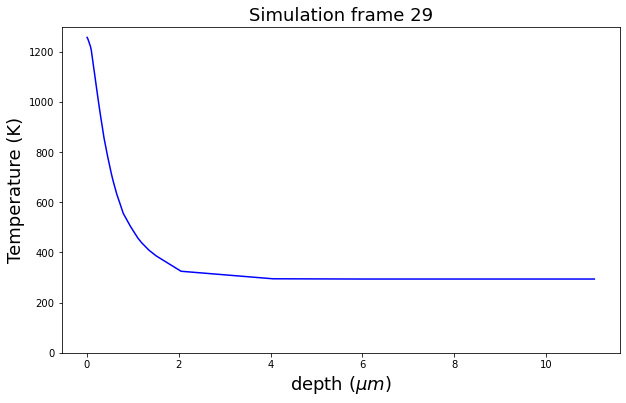

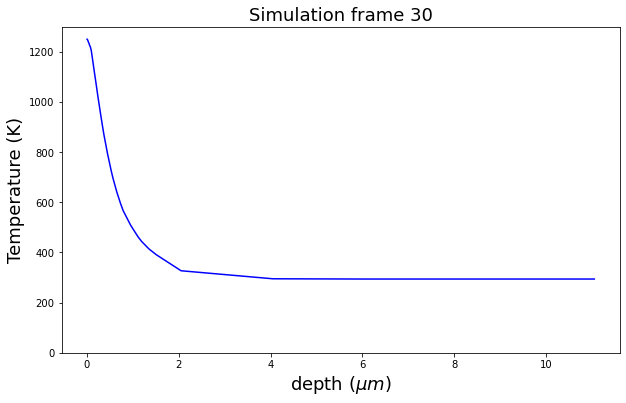

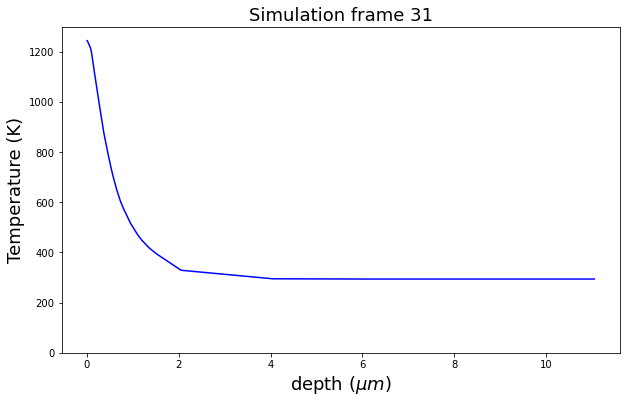

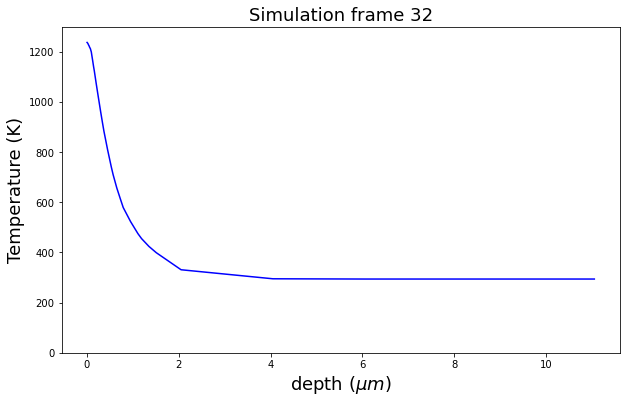

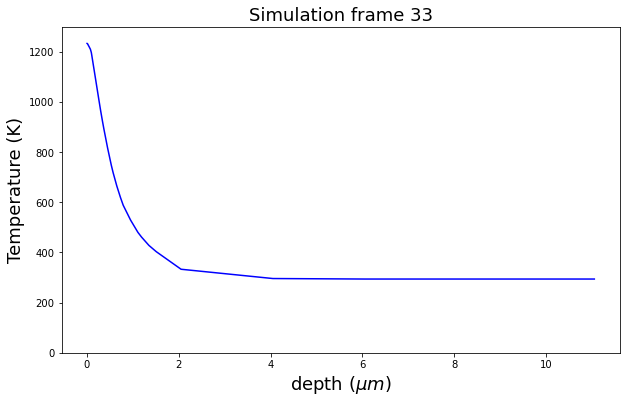

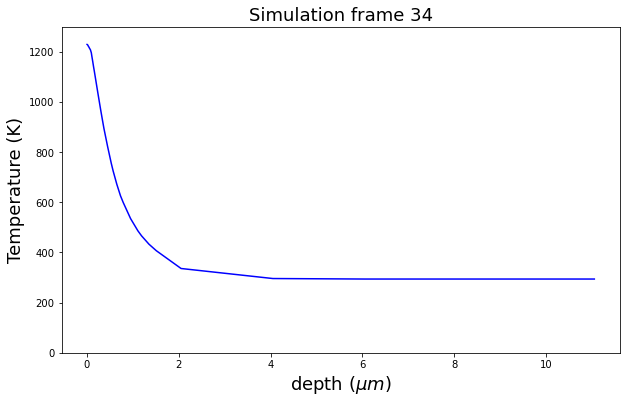

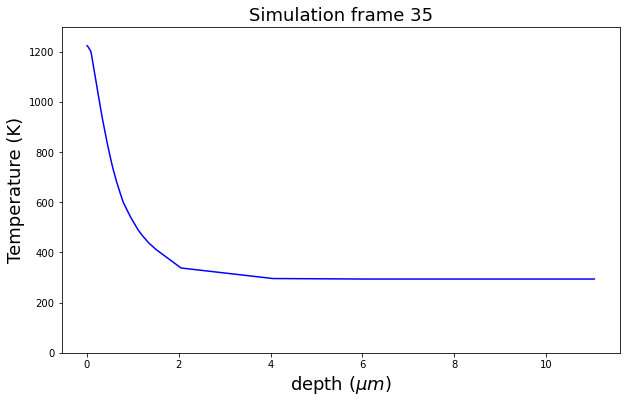

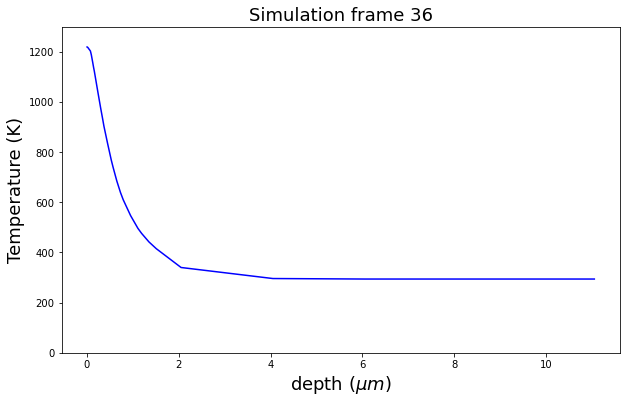

In [14]:
data = np.loadtxt(filename1)
x = data[:,0]*0.0001
X=data[:,:]
for i in range(1,len(X[0,:])):
    y = data[:,i]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, c='b')
    ax.set_ylim(0,maxTempReached)
    ax.set_title('Simulation frame %i' %i, size=18)
    ax.set_xlabel('depth ($\mu m$)', fontsize=18)
    ax.set_ylabel('Temperature (K)', fontsize=18)
    plt.show()

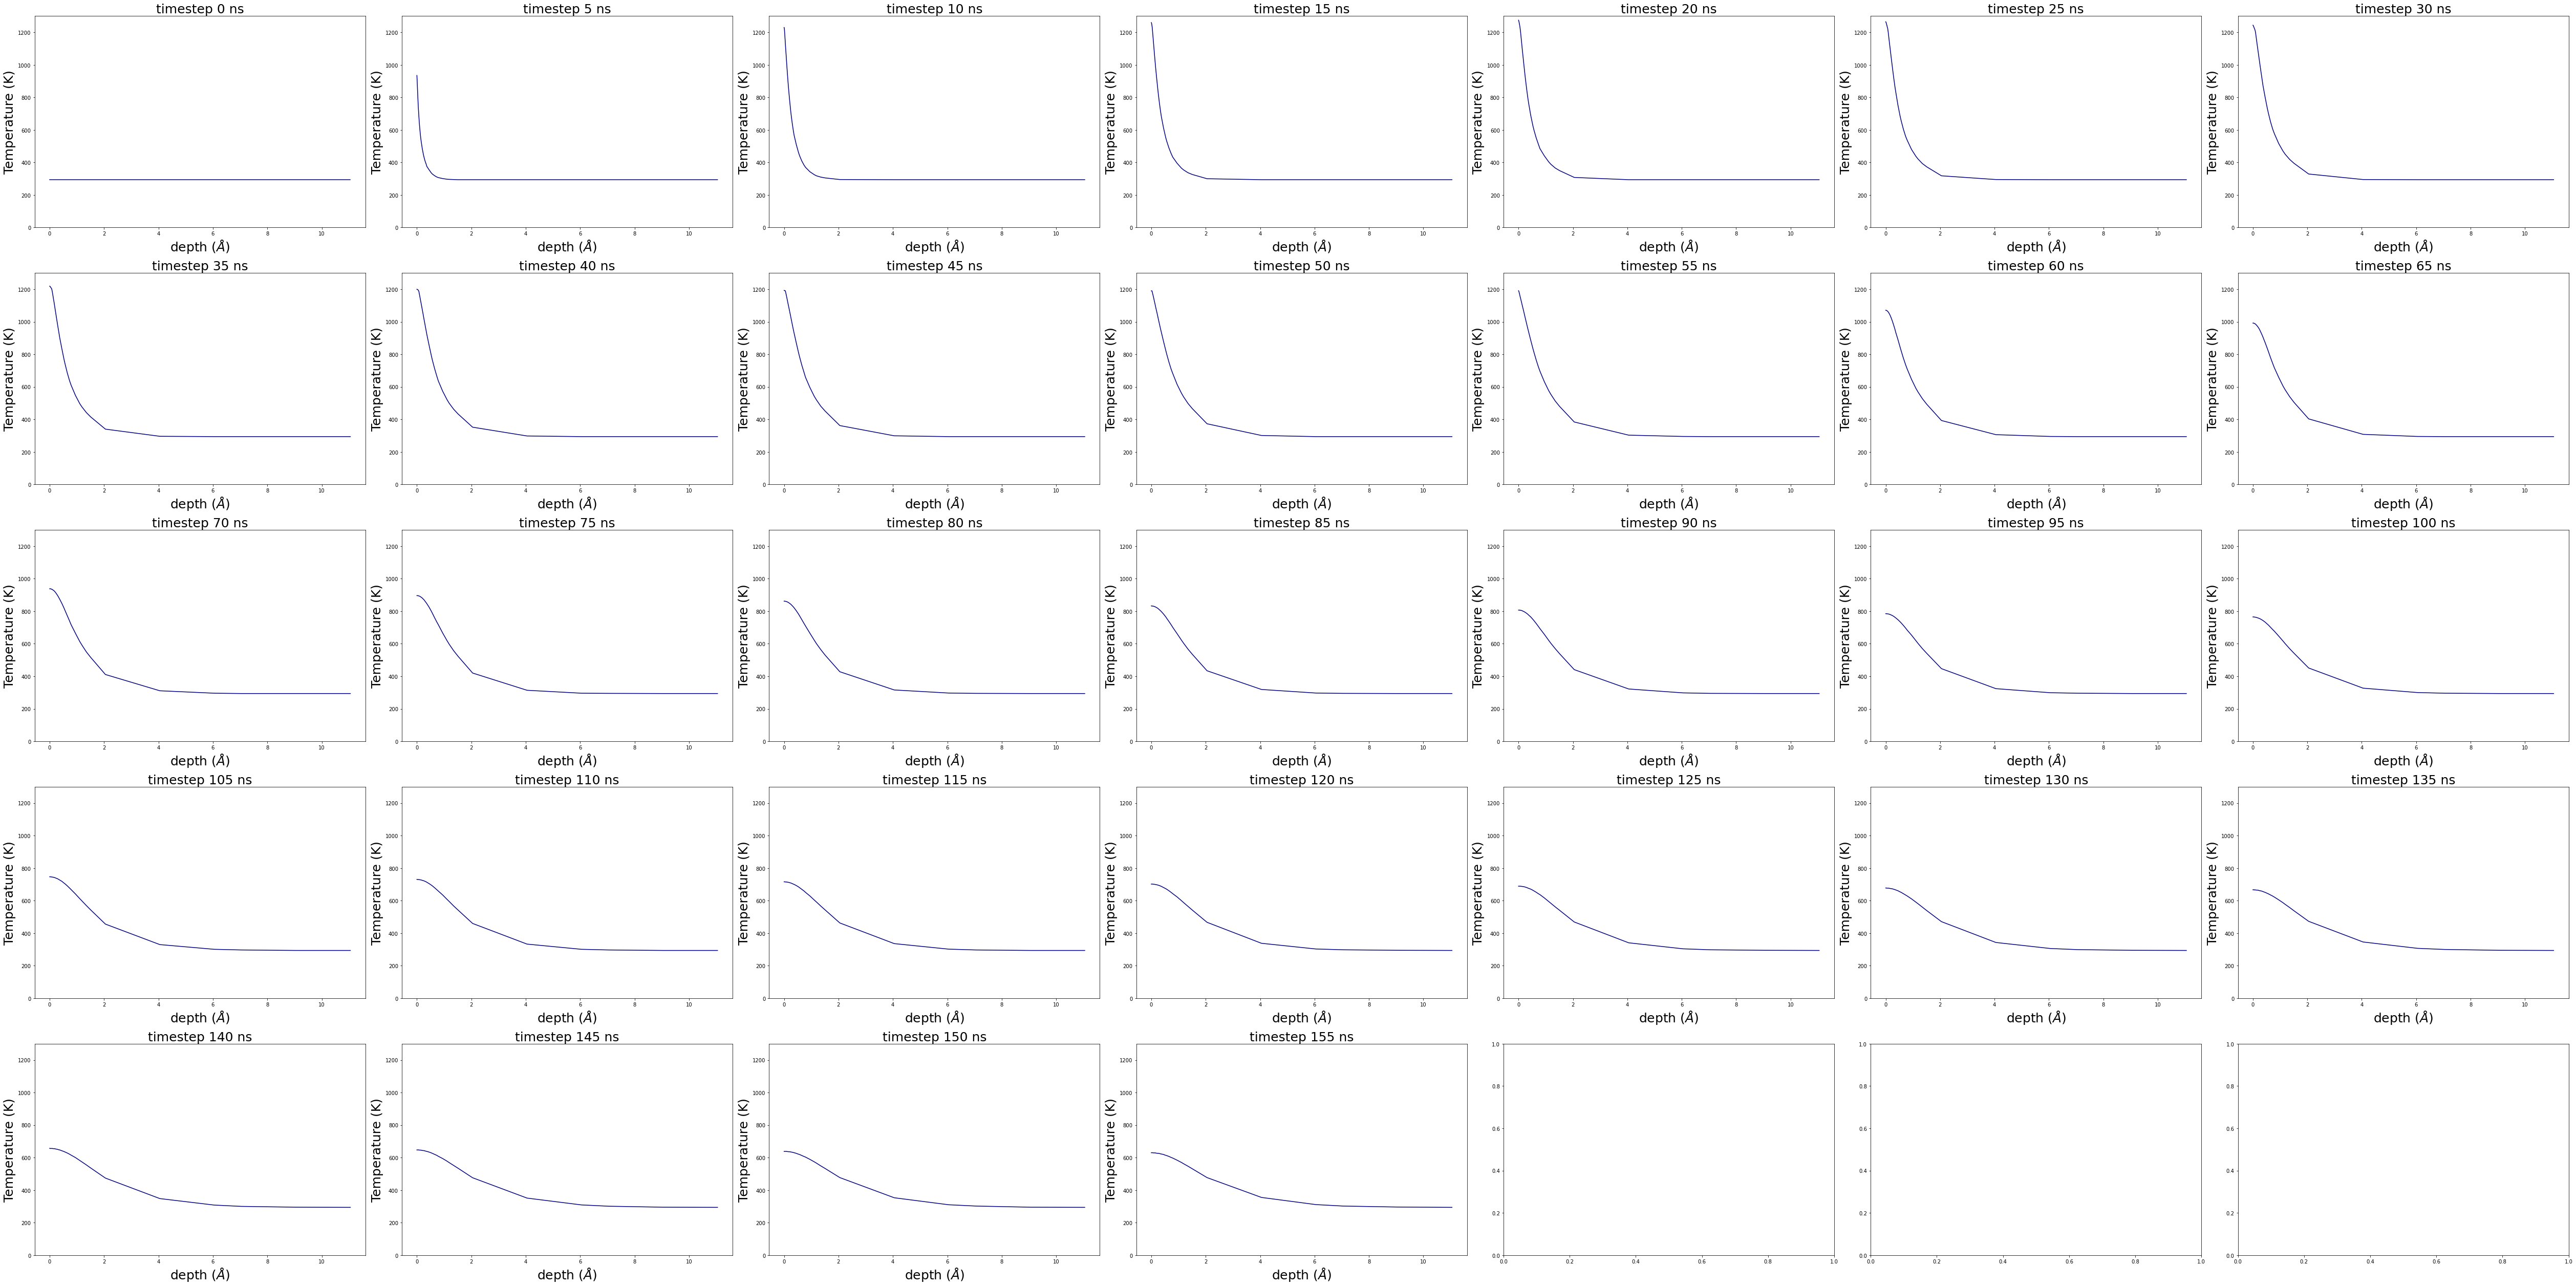

In [31]:
import matplotlib.gridspec as gridspec

data = np.loadtxt(filename1)
x = data[:,0]*0.0001
X=data[:,:]
n_cols=int(len(X[0,:])/5)#with different timestep check how many rows you desire
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))#with different timestep check how many rows you desire
ax = ax.ravel()
#fig.suptitle('Temperature (K) vs depth for energy impulse %i $mJ/cm^2$' %energy_impulse,fontsize=70)
for i in range(len(X[0,:])-1):
    y = data[:,i+1]
    t=(i)*timestep
    ax[i].plot(x, y,  c='navy')
    ax[i].set_ylim(0,maxTempReached)
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    ax[i].set_xlabel('depth ($\mu m$)', fontsize=25)
    ax[i].set_ylabel('Temperature (K)', fontsize=25)
fig.tight_layout()
plt.savefig('plot_Tvsdepth_%i_mJ' %energy_impulse)

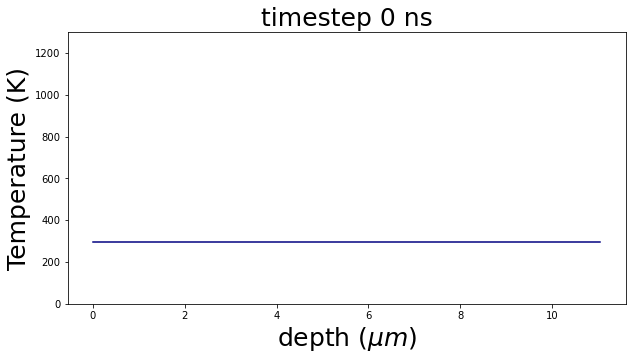

In [7]:
data = np.loadtxt(filename1)
x = data[:,0]*0.0001
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
def AnimationTvsDepth(i):
    plt.clf()
    y = data[:,i+1]
    t=(i)*timestep
    plt.plot(x, y,  c='navy')
    plt.ylim(0,maxTempReached)
    plt.title('timestep %i ns' %t,fontsize=25)
    plt.xlabel('depth ($\mu m$)', fontsize=25)
    plt.ylabel('Temperature (K)', fontsize=25)
f=len(X[0,:])-1  
animator = ani.FuncAnimation(fig, AnimationTvsDepth, f, interval = 200)
   
animator.save(r'AnimationTvsDepth_%i_mJ.avi' %energy_impulse)


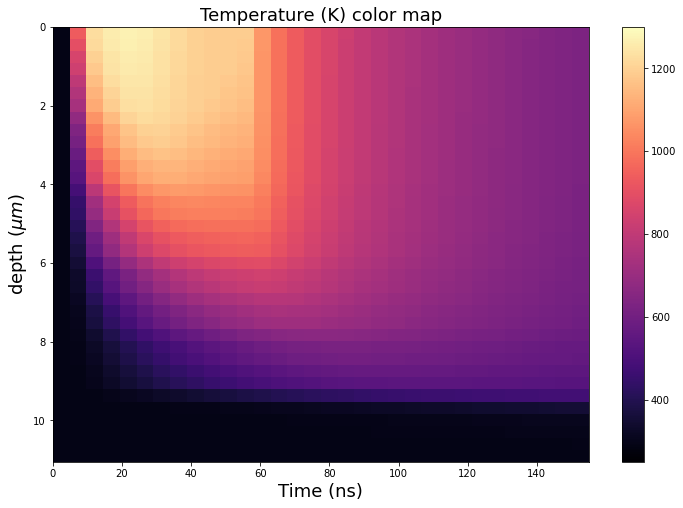

In [33]:
data = np.loadtxt(filename1)
X=data[:,1:]
fig, ax = plt.subplots(figsize=(12,8))
imagetoplot=ax.imshow(X, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,155,thickness_of_sample,0], aspect='auto')
fig.colorbar(imagetoplot, orientation='vertical')
ax.set_title('Temperature (K) color map',fontsize=18)
ax.set_xlabel('Time (ns)',fontsize=18)
ax.set_ylabel('depth ($\mu m$)',fontsize=18)
fig.savefig('plot_%i_mJ' %energy_impulse)

In [25]:
with open(filename2, mode='r+') as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i[0] != 'C':
            f.write(i)
    f.truncate()

In [26]:
data1 = np.loadtxt(filename2)
x1= data1[:,0]
y1 = data1[:,1]
maxA=max(y1)*0.0001
L=[]
for i in range(len(x1)):
    L.append([x1[i],y1[i]])
dim=len(x1)
for i in range(len(L)-2):
    if L[i][0]% timestep != 0:
        L.pop(i)
tdepth=np.array(L)

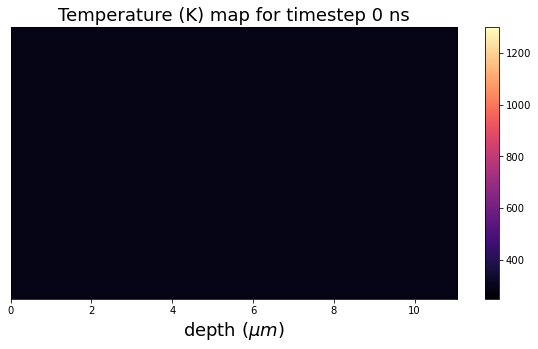

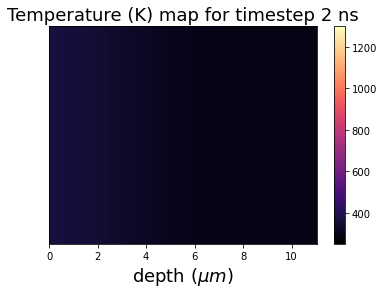

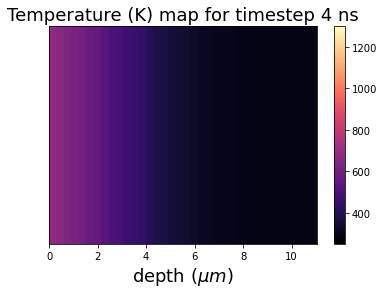

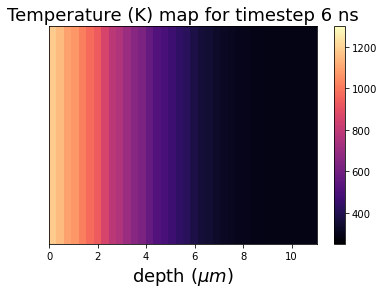

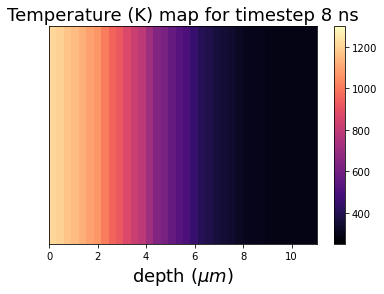

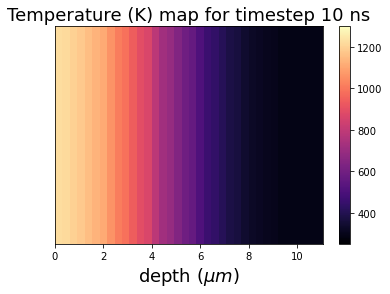

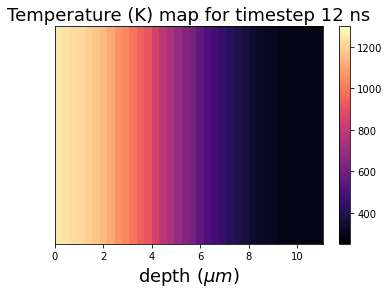

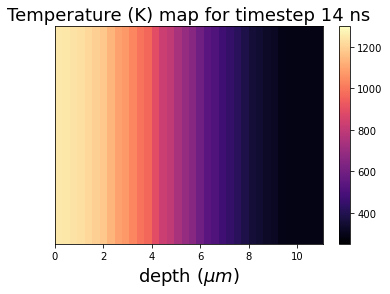

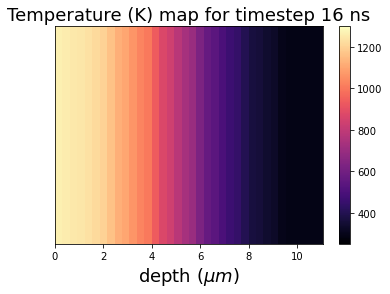

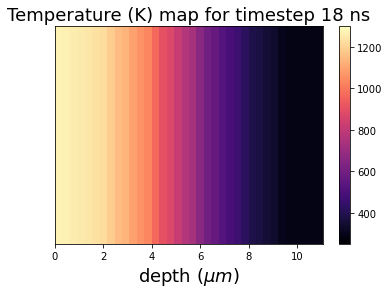

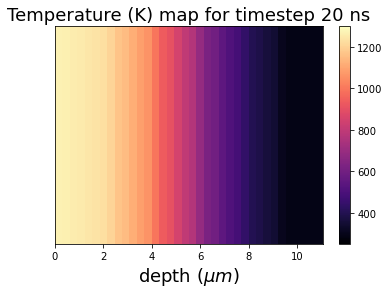

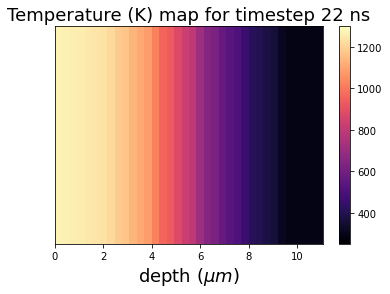

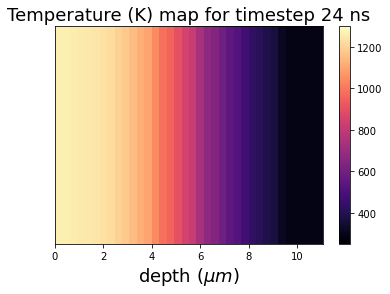

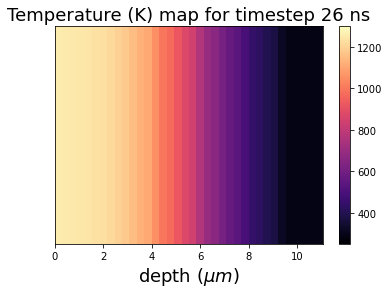

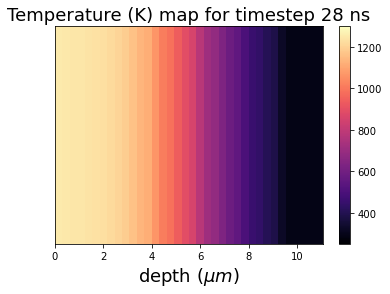

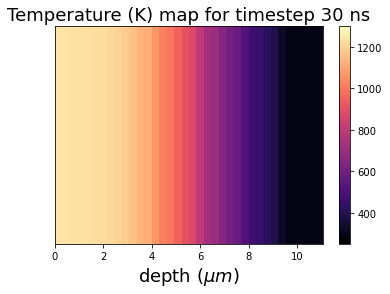

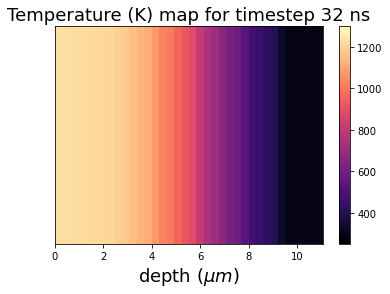

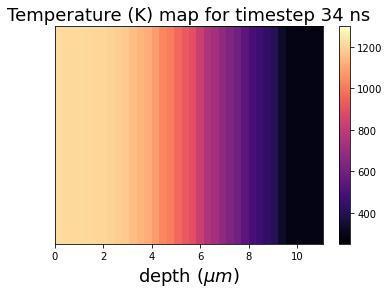

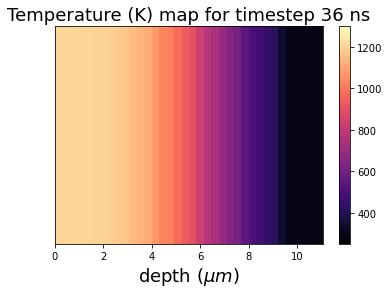

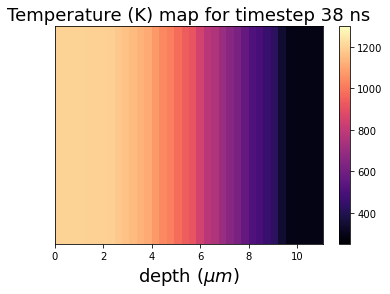

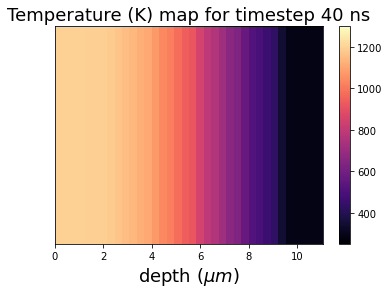

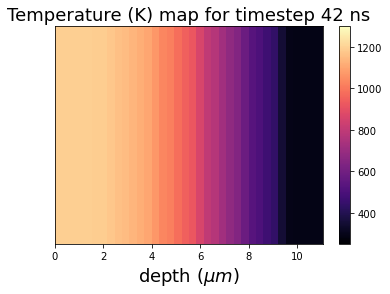

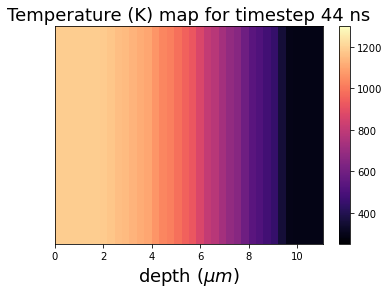

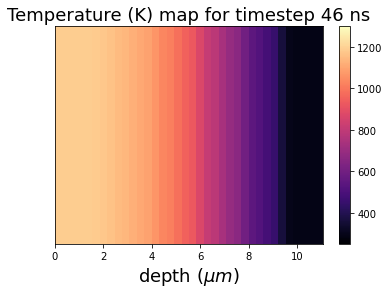

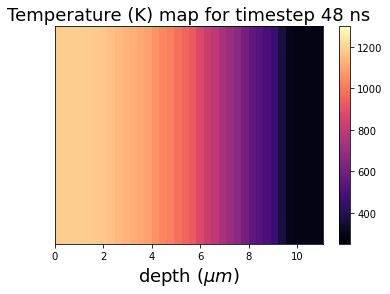

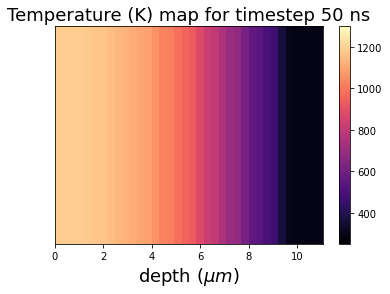

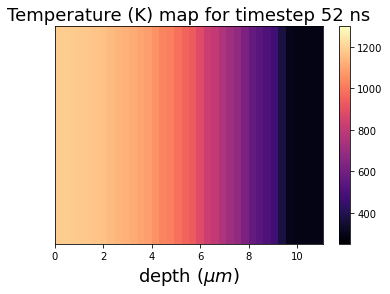

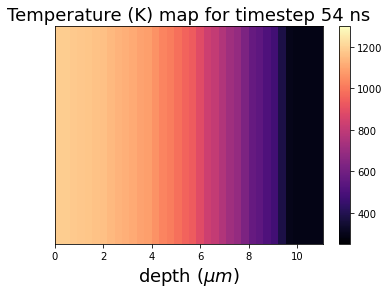

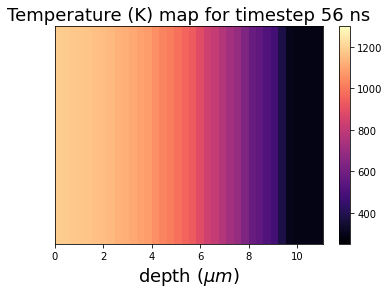

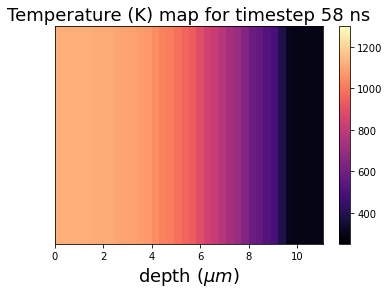

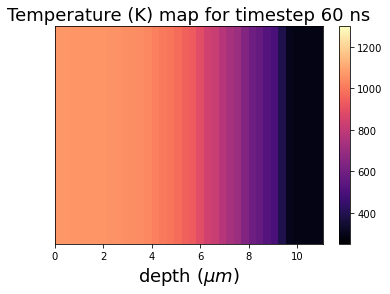

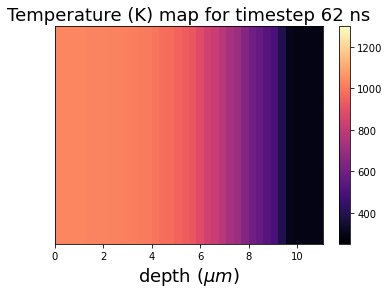

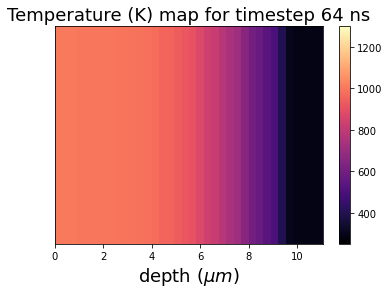

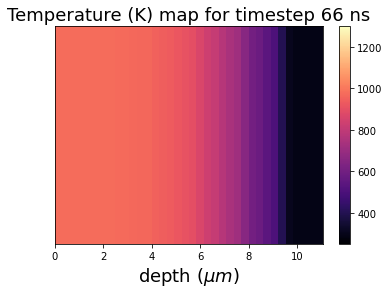

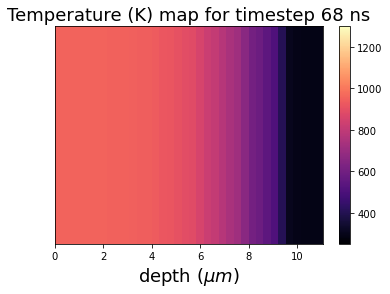

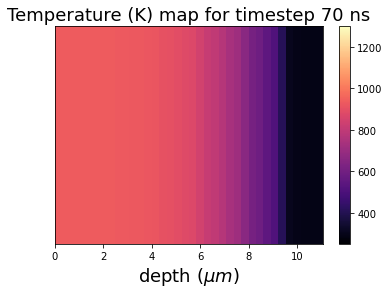

In [10]:
x = data[:,0]*0.0001
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
times=[]
for i in range(1,len(X[0,:])):
    t=(i-1)*timestep
    times.append(t)
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,thickness_of_sample,0,100], aspect='auto')
    plt.title('Temperature (K) map for timestep %i ns' %t,fontsize=18)
    plt.colorbar(imagetoplot, orientation='vertical')
    plt.xlabel('depth ($\mu m$)',fontsize=18)
#    plt.xlim(0,1)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
#   plt.savefig('plot %i ns' %t)
    plt.show()

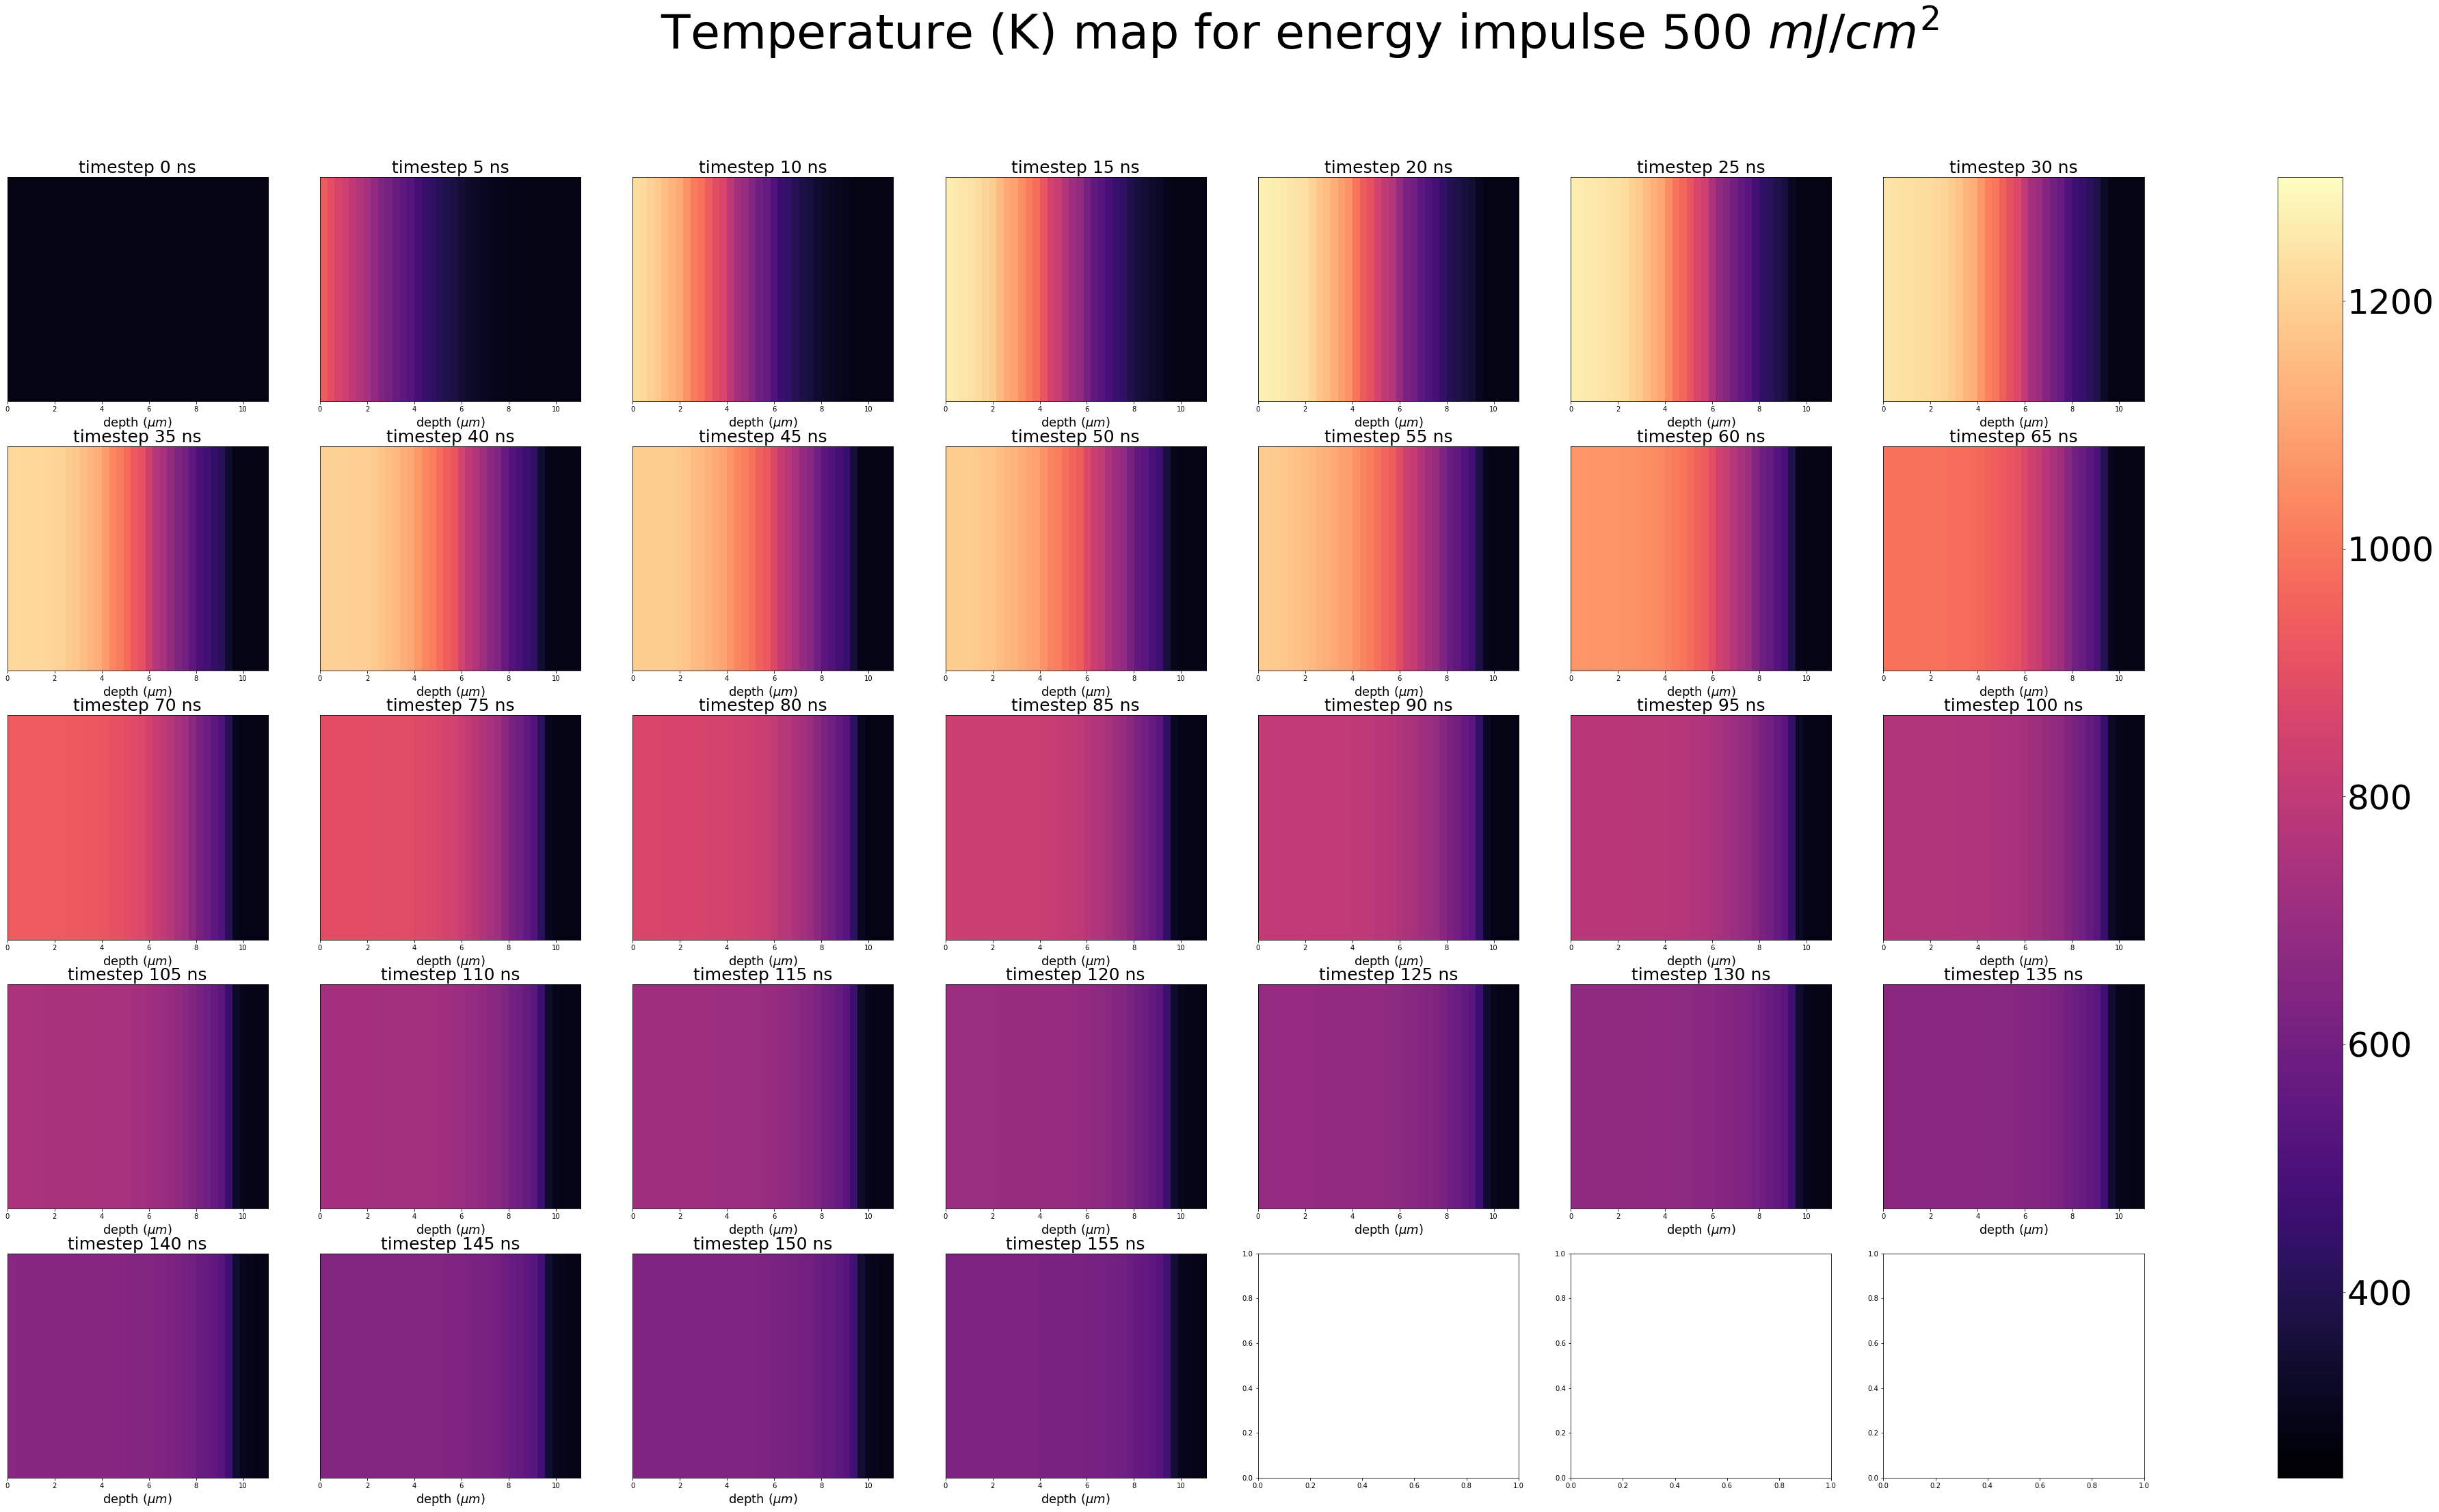

In [27]:
x = data[:,0]
X=data[:,:]
times=[]
n_cols=int(len(X[0,:])/5)#with different timestep check how many rows you desire
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))#with different timestep check how many rows you desire
ax = ax.ravel()
fig.suptitle('Temperature (K) map for energy impulse %i $mJ/cm^2$' %energy_impulse,fontsize=70)
for i in range(0,len(X[0,:])-1):
    t=(i)*timestep
    times.append(t)
    y = data[:,i+1]
    Y=np.vstack((y,y))
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    imagetoplot=ax[i].imshow(Y, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,thickness_of_sample,0,100], aspect='auto') 
    ax[i].set_xlabel('depth ($\mu m$)',fontsize=18)
    ax[i].yaxis.set_major_locator(ticker.NullLocator())
    
cbar=fig.colorbar(imagetoplot, orientation='vertical',ax=ax)
cbar.ax.tick_params(labelsize=50)
plt.savefig('globalplot_%i_mJ' %energy_impulse)

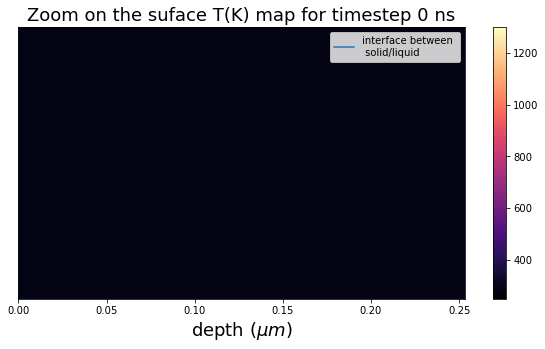

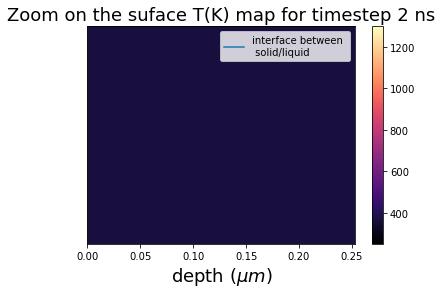

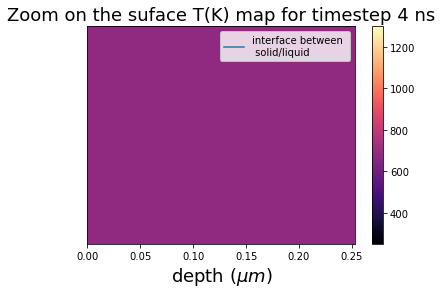

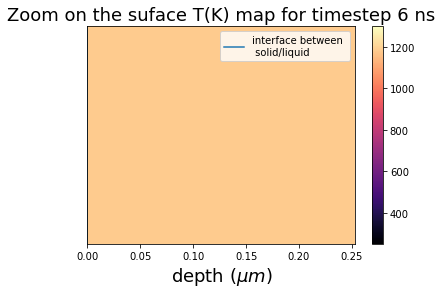

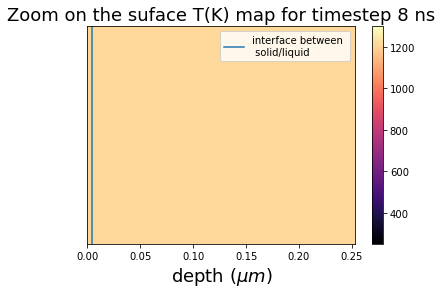

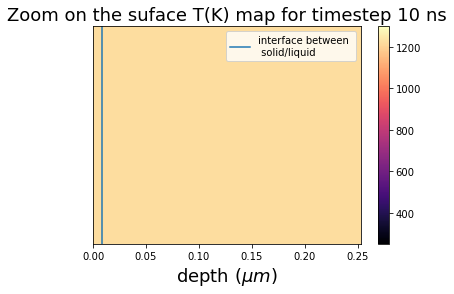

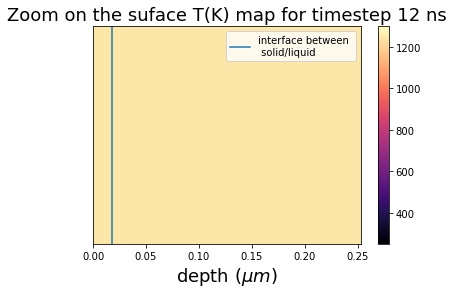

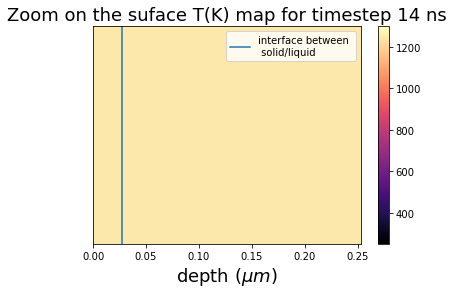

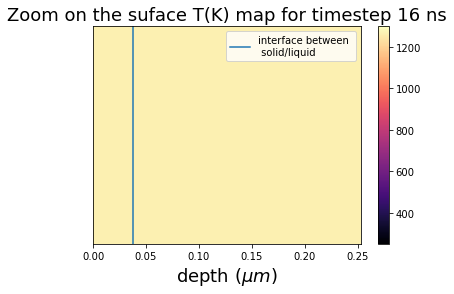

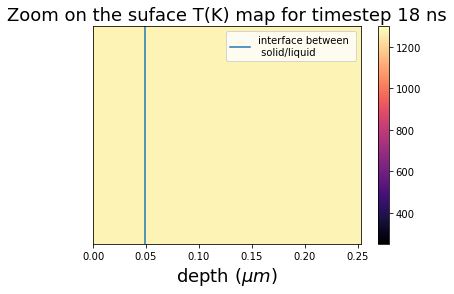

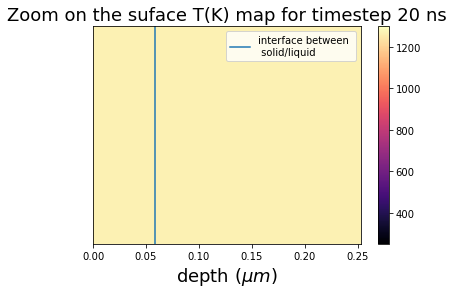

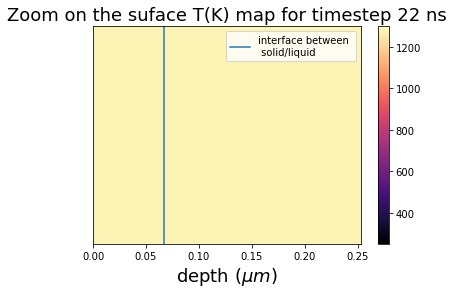

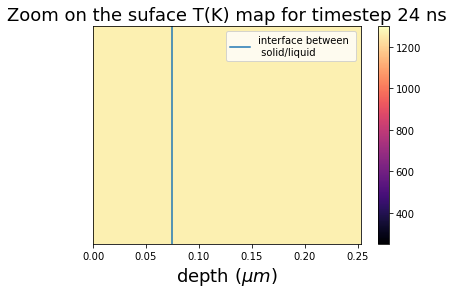

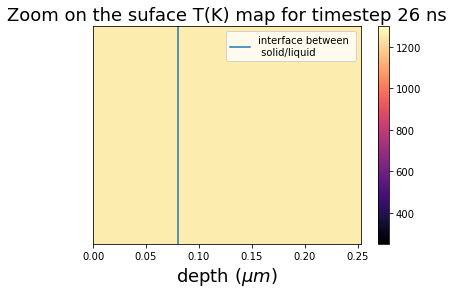

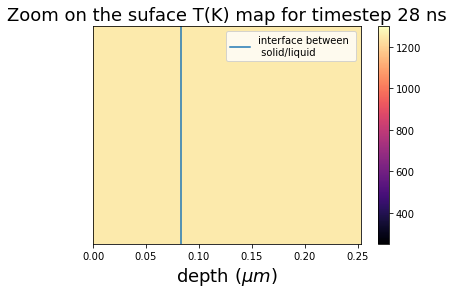

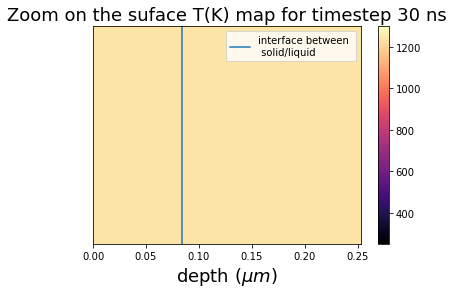

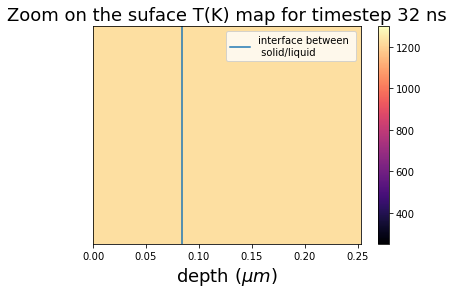

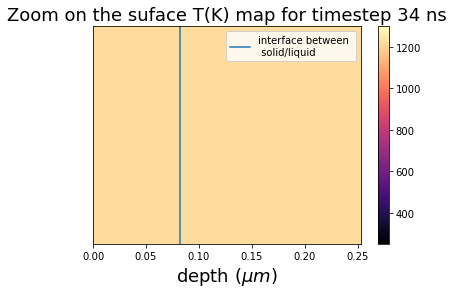

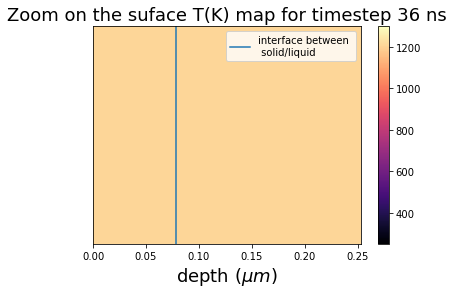

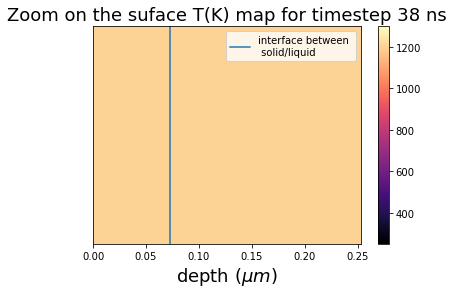

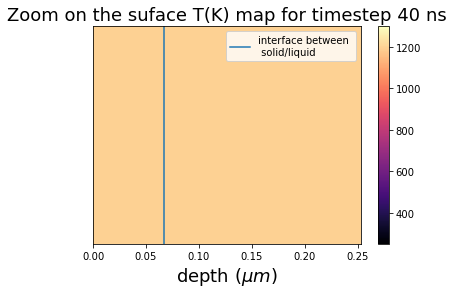

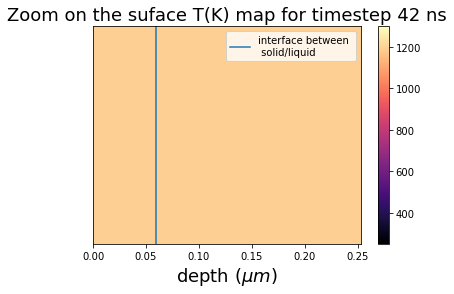

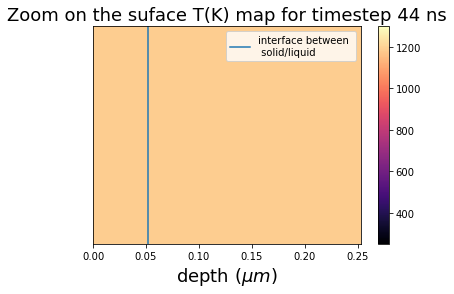

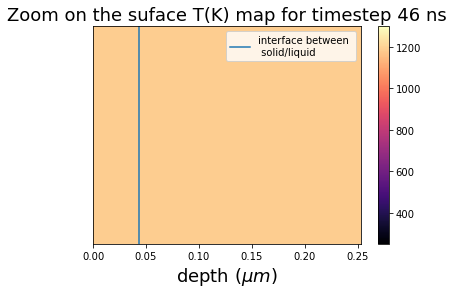

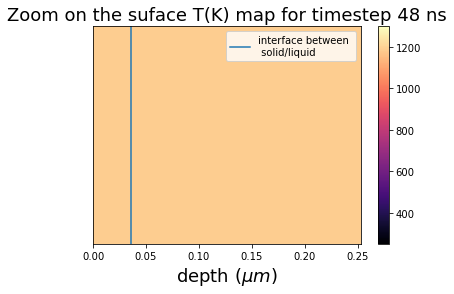

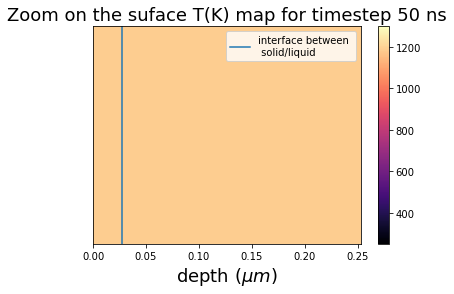

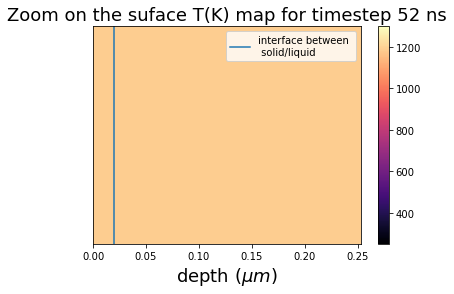

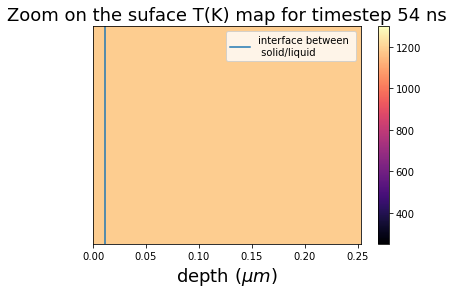

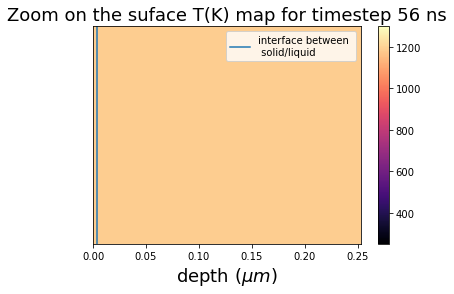

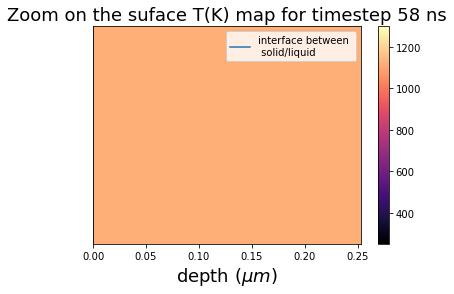

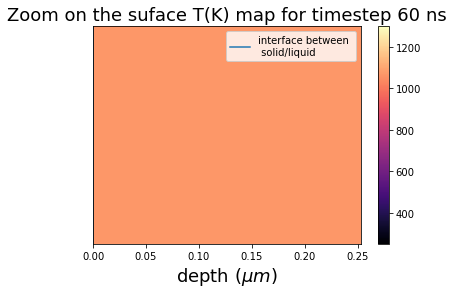

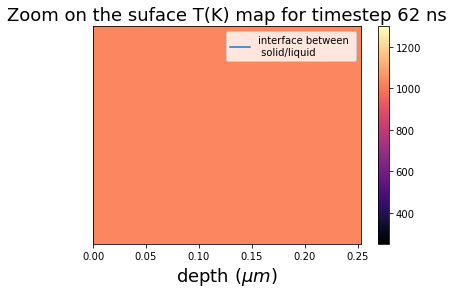

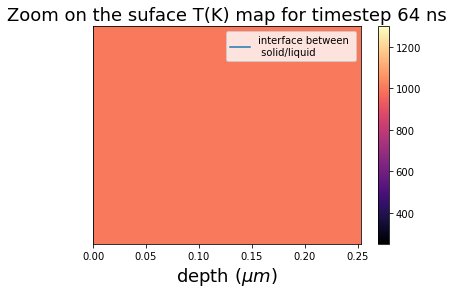

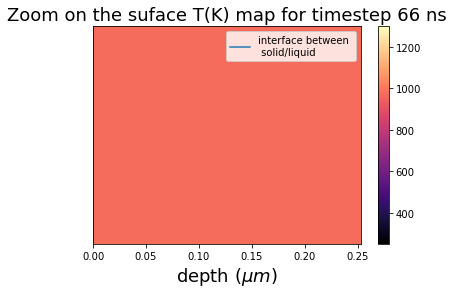

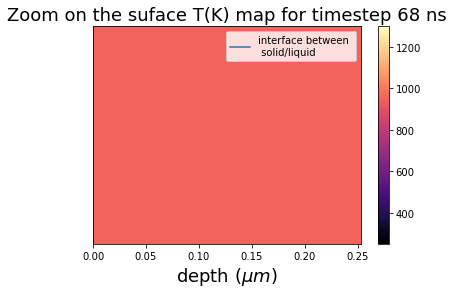

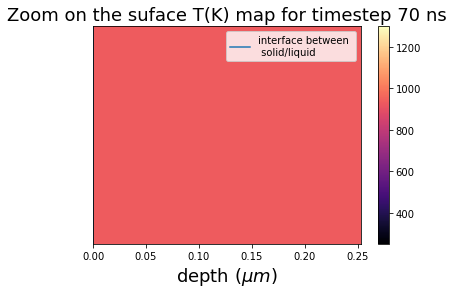

In [12]:
x = data[:,0]
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
times=[]
for i in range(1,len(X[0,:])):
    t=(i-1)*timestep
    times.append(t)
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='magma', vmin=250, vmax=maxTempReached,extent=[0,thickness_of_sample,0,100], aspect='auto')
    depth=tdepth[i-1][1]*0.0001
    x1, y1 = [depth,depth],[0,100]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    plt.title('Zoom on the suface T(K) map for timestep %i ns' %t,fontsize=18)
    plt.xlim(0,maxA*3)
    plt.colorbar(imagetoplot, orientation='vertical')
    plt.xlabel('depth ($\mu m$)',fontsize=18)
    plt.legend()
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
#   plt.savefig('plot %i ns' %t)
    plt.show()

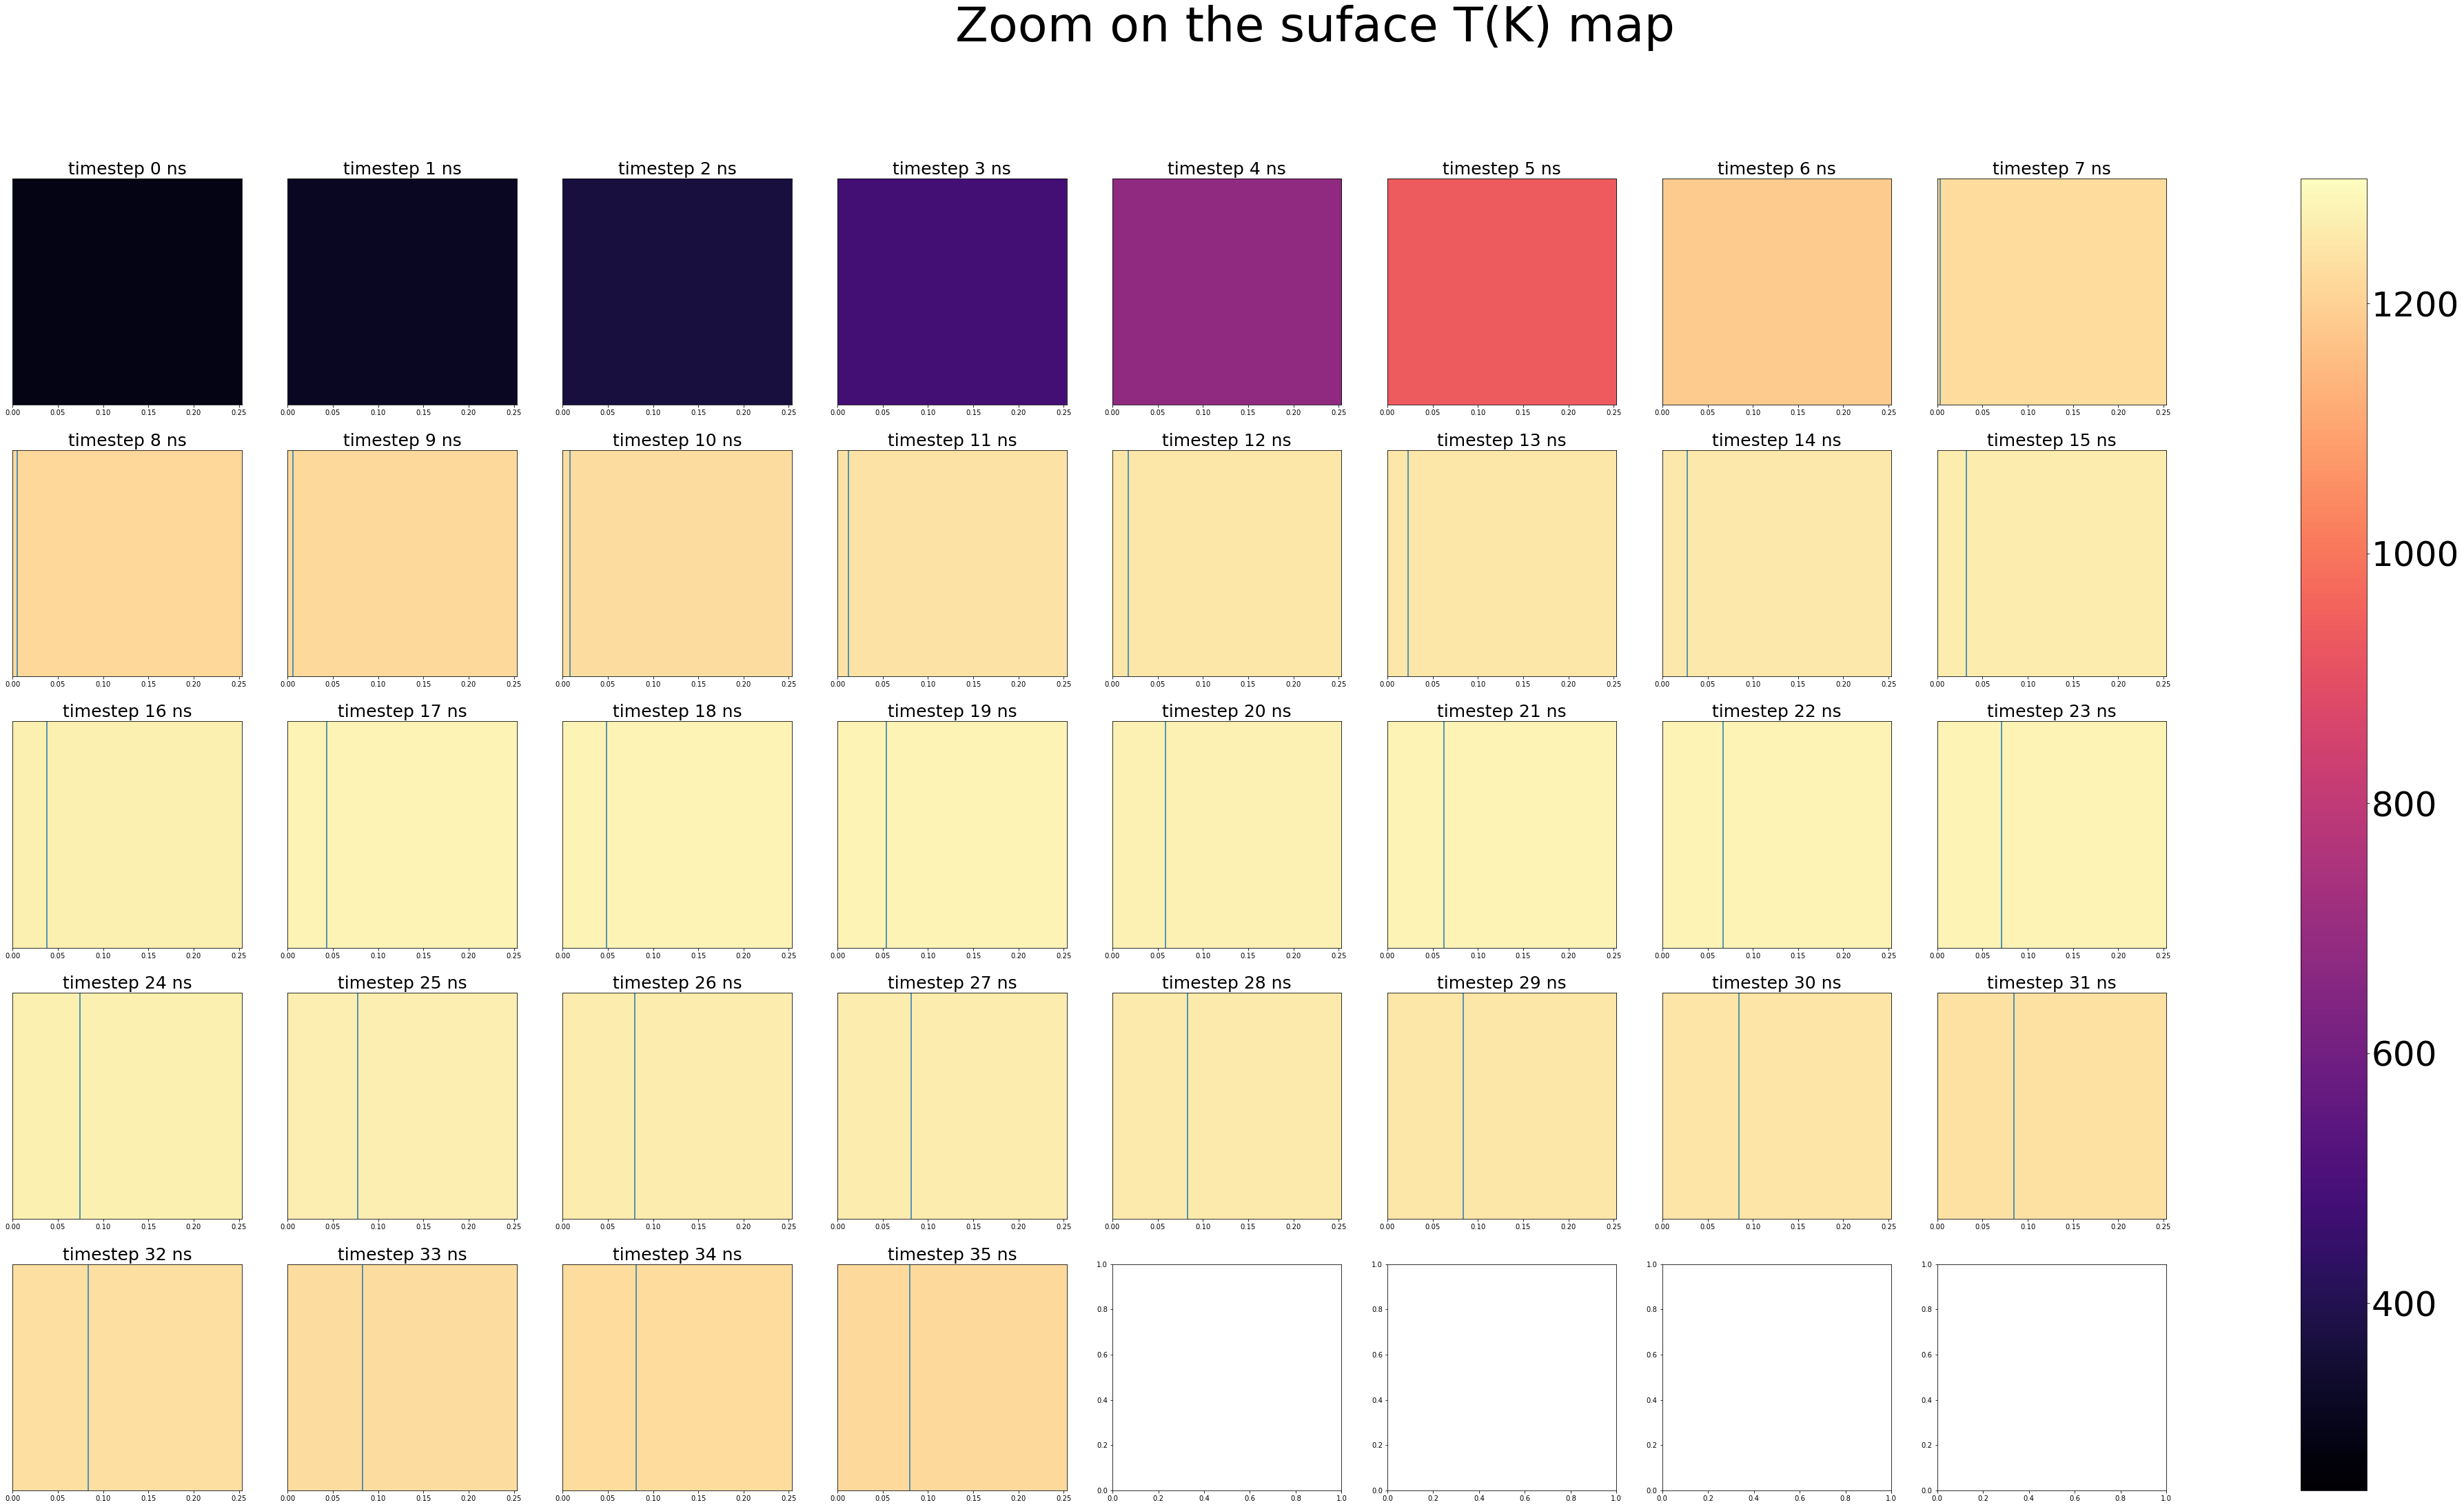

In [19]:
x = data[:,0]*0.0001
X=data[:,:]
times=[]

n_cols=int(len(X[0,:])/5)
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))
plt.suptitle('Zoom on the suface T(K) map', fontsize=70)
ax = ax.ravel()

for i in range(0,len(X[0,:])-1):
    t=(i)*timestep
    times.append(t)
    y = data[:,i+1]
    Y=np.vstack((y,y))
    imagetoplot=ax[i].imshow(Y, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,thickness_of_sample,0,100], aspect='auto')
    depth=tdepth[i][1]*0.0001 #if timestep 2 set [i+1] if timestep 5 set [i]
    x1, y1 = [depth,depth], [0,100]
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    ax[i].plot(x1, y1, label='interface between \n solid/liquid')
    ax[i].set_xlim(0,maxA*3)
    ax[i].yaxis.set_major_locator(ticker.NullLocator())
cbar=fig.colorbar(imagetoplot, orientation='vertical',ax=ax)
cbar.ax.tick_params(labelsize=50)
fig.savefig('zoomplot%i_mJ'  %energy_impulse)

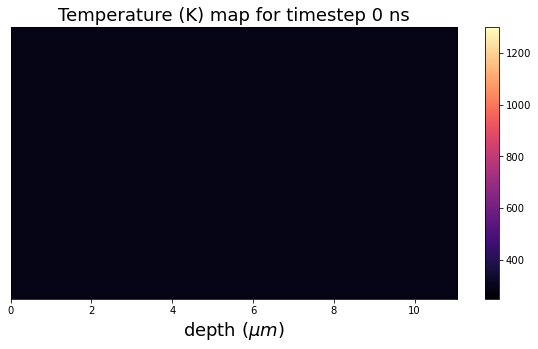

In [20]:
x = data[:,0]*0.0001
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
plt.colorbar(imagetoplot, orientation='vertical')
def AnimationLaserMelting(i):
    i=i+1
    t=(i-1)*timestep
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,thickness_of_sample,0,100], aspect='auto')
    plt.title('Temperature (K) map for timestep %i ns' %t,fontsize=18)
    plt.xlabel('depth ($\mu m$)',fontsize=18)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
f=len(X[0,:])-2
animator = ani.FuncAnimation(fig, AnimationLaserMelting, f, interval = 200)
   
animator.save(r'globalsampleLaserMelting_%i_mJ.avi' %energy_impulse)



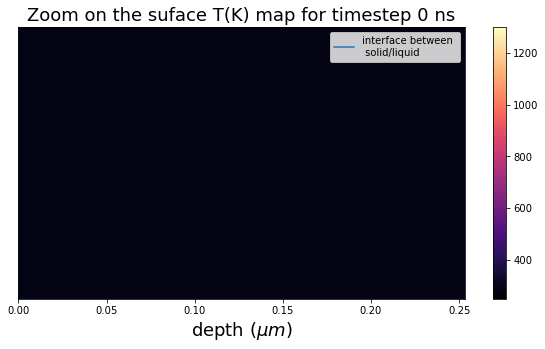

In [28]:
x = data[:,0]*0.0001
X=data[:,:]

fig1 = plt.figure( figsize=(10, 5))
def ZoomLaserMelting(i):
    plt.clf()
    t=(i)*timestep
    y = data[:,i+1]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='magma', vmin=250, vmax=maxTempReached,extent=[0,thickness_of_sample,0,100], aspect='auto')
    plt.colorbar(imagetoplot, orientation='vertical')
    depth=tdepth[i][1]*0.0001
    x1, y1 = [depth,depth],[0,100]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    plt.title('Zoom on the suface T(K) map for timestep %i ns' %t,fontsize=18)4E34SXZ3WSX
    plt.xlim(0,maxA*3)
    plt.xlabel('depth ($\mu m$)',fontsize=18)
    plt.legend()
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #plt.show()
f1=len(X[0,:])-1
animator1 = ani.FuncAnimation(fig1, ZoomLaserMelting, f1, interval = 200)
   
animator1.save(r'zoomLaserMelting_%i_mJ.avi'  %energy_impulse)